<h3><center>Alexandra Almeida</center></h3> 
<h1><center>Project "Green Chillies Prices in India"</center></h1>
<img src="https://upskill.pt/wp-content/uploads/2020/03/cropped-APDC_UPSKILLS_Logo-300x83.png" width="200" align="center">

The present project was carried out under the Machine Learning module as part of the UpsKill program.

I have select a public dataset which contains a time list of chili peppers prices in India over 2048 days. The goal is to forecast prices for next 90 days.

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
# import excel file and convert into pandas
df = pd.read_csv('Chillies Prices in India.csv', delimiter=';')
df.head()

,datesk,Item Name,Date,price
0,20110101,Chillies Green,01/01/2011,NaN
1,20110101,Chillies Bajji,01/01/2011,NaN
2,20110101,Chillies Cleaned,01/01/2011,NaN
3,20110101,Chillies small (C.B.P),01/01/2011,NaN
4,20110101,Chillies Bajji yagani,01/01/2011,NaN


In [3]:
# check dataframe'shape
df.shape

(13065, 4)

In [4]:
df = df[(df['Item Name']== 'Chillies Green')]
df.shape

(2613, 4)

In [5]:
#drop missing values
df.dropna(inplace=True)

In [9]:
#convert the 'Date' column into a datetime format so that it can interpreted as a date
df['Date'] = pd.to_datetime(df['datesk'], format="%Y%m%d")
df.head()

,datesk,Date,price
0,20110309,2011-03-09,30.0
1,20110310,2011-03-10,30.0
2,20110314,2011-03-14,30.0
3,20110316,2011-03-16,30.0
4,20110317,2011-03-17,30.0


In [6]:
# remove column 'datesk' and 'Item Name'
df.drop(columns = ['datesk','Item Name'], inplace=True)

In [7]:
# remove rows where price is 0
df = df[~(df['price']== 0)]
df.reset_index(drop=True, inplace=True)
df.shape

(2048, 3)

In [8]:
# get the general descriptive statistics from data
df.describe()

,datesk,price
count,2.048000e+03,2048.000000
mean,2.014243e+07,35.721191
std,2.003213e+04,21.060151
min,2.011031e+07,16.000000
25%,2.012122e+07,25.000000
50%,2.014090e+07,30.000000
75%,2.016051e+07,40.000000
max,2.018023e+07,598.000000


After cleaning all columns and rows not needed, we can plot the data and visualize the prices evolution. We can see 2 data points where prices were much higher than usual.

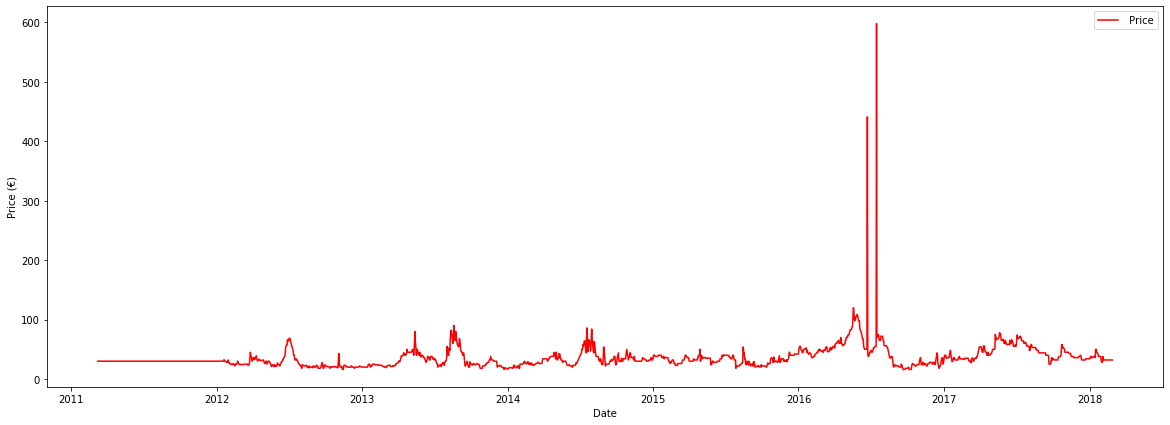

In [11]:
df.sort_values(by=['Date'], ascending = True, inplace = True)

# creating a pot in order to visualize the price evolution.
plt.figure(figsize=(20,7))
plt.plot(df['Date'].values, df['price'].values, label = ' Price', color = 'red')
# plt.xticks(np.arange(100,df.shape[0],100))
plt.xlabel('Date')
plt.ylabel('Price (€)')
plt.legend()
plt.show()

In [12]:
# sort the dataframe by descending price in order to find the 2 outlier prices
df.sort_values(by=['price'], ascending=False)

,Date,price
1592,2016-07-15,598.0
1574,2016-06-22,441.0
1544,2016-05-18,120.0
1545,2016-05-19,115.0
1551,2016-05-26,108.0
...,...,...
1649,2016-10-07,16.0
1648,2016-10-06,16.0
1638,2016-09-22,16.0
1639,2016-09-24,16.0


In [13]:
#remove prices values 598.0 and 441.0
outliers = df.index[[1574,1592]]
df.drop(outliers, inplace=True)

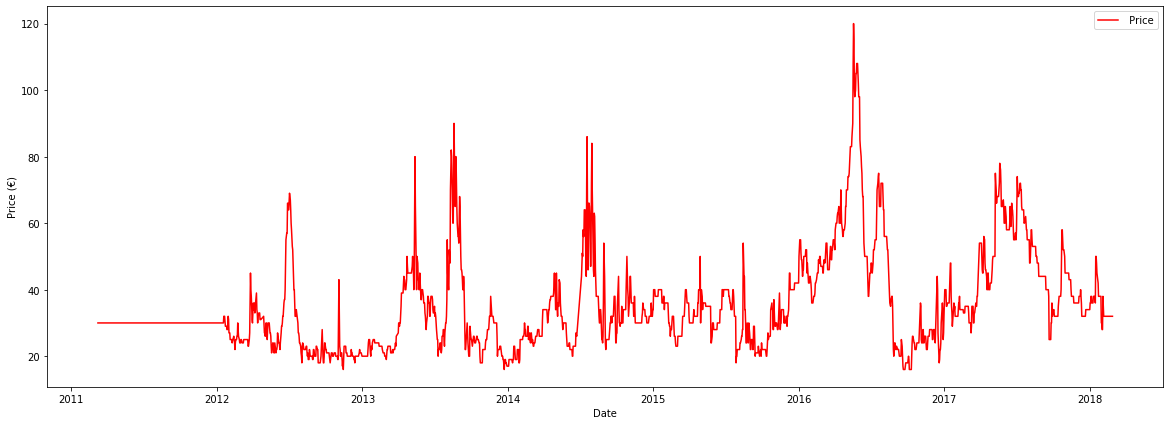

In [14]:
plt.figure(figsize=(20,7))
plt.plot(df['Date'].values, df['price'].values, label = ' Price', color = 'red')
# plt.xticks(np.arange(100,df.shape[0],200))
plt.xlabel('Date')
plt.ylabel('Price (€)')
plt.legend()
plt.show()

## ARIMA (INCOMPLETE - ONGOING)

The Augmented Dickey Fuller test  from the statsmodels package was used to see if the series is stationary. The null hypothesis (Ho) of the ADF test is that the time series is non-stationary. So, if the p-value of the test is less than the significance level (0.05) then we reject the null hypothesis and infer that the time series is  stationary.

In [18]:
# We apply the adfuller method to get the ADF and p-value results

from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df.price.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -4.228635
p-value: 0.000589


In [19]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(df.price, order=(1,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\malme\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\malme\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                 2045
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -5553.548
Method:                       css-mle   S.D. of innovations              3.657
Date:                Sat, 30 Jan 2021   AIC                          11117.096
Time:                        12:48:39   BIC                          11145.212
Sample:                             1   HQIC                         11127.408
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0010      0.057      0.017      0.986      -0.112       0.114
ar.L1.D.price     0.2231      0.065      3.451      0.001       0.096       0.350
ma.L1.D.price    -0.2358      0.062     

p-value is less than the significance level so we infer the time series is stationary

## LSTM

In [ ]:
# reserve ~80% of the number of records for training
num_shape = 1600

train = df.iloc[:num_shape, 1:2].values
test = df.iloc[num_shape:, 1:2].values

Scaling our features using normalization. Normalizing data helps the algorithm in converging i.e. to find local/ global minimum efficiently.

In [ ]:
sc = MinMaxScaler()
train_scaled = sc.fit_transform(train)